<a href="https://colab.research.google.com/github/eshitalakhani/Transport-Demand-Prediction/blob/main/Copy_of_Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

## 1) LOADING THE DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/capstone 2/train_revised.csv")
dppt = dataset.copy()
dppt.head()
# dppt = Demand Prediction for public transport

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [4]:
dppt.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


## 2) UNDERSTANDING THE DATA

In [5]:
dppt.shape
#There are 51645 observations in the dataset. And has 10 columns.

(51645, 10)

In [6]:
dppt.size

516450

In [7]:
dppt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [8]:
dppt.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [9]:
dppt.isnull().sum()
#the given dataset is so precise that having no null values 

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [22]:
# Calculation of Target varible based on the ride id
tmp_no_tickect_dppt = dppt.groupby(['ride_id']).seat_number.count().rename('number_of_ticket').reset_index()
tmp_no_tickect_dppt.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,1
4,5778,1


In [24]:
# droping the duplicate value rows with the repeating ride_id
dppt.drop_duplicates('ride_id', inplace = True)

# Dropping the columns which are not relevant to our target variable
dppt.drop(['seat_number','payment_method','payment_receipt', 'travel_to'], inplace= True, axis = 1)
dppt.shape

(6249, 6)

In [26]:
# Merging the calculated target variable column to the dataset based on the ride_id
dppt = dppt.merge(tmp_no_tickect_dppt, how= 'left', on='ride_id')
# Combaining the date column and time column to get the complete timestamp
dppt['travel_date_and_time'] = dppt['travel_date'] + " " + dppt['travel_time']
dppt['travel_date_and_time'] = pd.to_datetime(dppt['travel_date_and_time'])
dppt.drop(['travel_date', 'travel_time'], inplace= True, axis= 1)
dppt.head()

,ride_id,travel_from,car_type,max_capacity,number_of_ticket,travel_date_and_time
0,1442,Migori,Bus,49,1,2017-10-17 07:15:00
1,5437,Migori,Bus,49,1,2017-11-19 07:12:00
2,5710,Keroka,Bus,49,1,2017-11-26 07:05:00
3,5777,Homa Bay,Bus,49,1,2017-11-27 07:10:00
4,5778,Migori,Bus,49,1,2017-11-27 07:12:00


In [10]:
dppt.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


## 3) DATA WRANGLING

In [11]:
# since there is no NAN values checking for repeated values in travel_date to remove
dppt.drop_duplicates('ride_id',inplace = True)

In [12]:
dppt['travel_date'].unique()

array(['17-10-17', '19-11-17', '26-11-17', '27-11-17', '20-04-18',
       '19-04-18', '18-04-18', '17-04-18', '16-04-18', '15-04-18',
       '14-04-18', '13-04-18', '12-04-18', '11-04-18', '28-11-17',
       '10-04-18', '09-04-18', '08-04-18', '07-04-18', '06-04-18',
       '05-04-18', '04-04-18', '03-04-18', '02-04-18', '01-04-18',
       '31-03-18', '30-03-18', '29-03-18', '28-03-18', '27-03-18',
       '29-11-17', '26-03-18', '25-03-18', '24-03-18', '23-03-18',
       '22-03-18', '21-03-18', '20-03-18', '19-03-18', '18-03-18',
       '17-03-18', '16-03-18', '30-11-17', '01-12-17', '15-03-18',
       '02-12-17', '14-03-18', '13-03-18', '03-12-17', '04-12-17',
       '12-03-18', '05-12-17', '11-03-18', '06-12-17', '10-03-18',
       '09-03-18', '07-12-17', '08-03-18', '08-12-17', '07-03-18',
       '06-03-18', '09-12-17', '10-12-17', '05-03-18', '04-03-18',
       '11-12-17', '12-12-17', '03-03-18', '02-03-18', '13-12-17',
       '01-03-18', '14-12-17', '28-02-18', '27-02-18', '15-12-

In [13]:
pd.DataFrame(dppt.travel_time.value_counts())

,travel_time
7:04,403
7:08,329
7:06,296
7:09,291
7:05,251
...,...
11:05,8
11:07,6
11:06,6
11:08,3


In [14]:
pd.DataFrame(dppt.seat_number.unique())

,0
0,15A
1,14A
2,8B
3,19A
4,11A
5,22A
6,1X
7,1B
8,1
9,5


In [15]:
pd.DataFrame(dppt.travel_time.unique())

,0
0,7:15
1,7:12
2,7:05
3,7:10
4,7:09
...,...
73,19:07
74,11:08
75,11:09
76,23:09


In [16]:
# Calculation of Target varible based on the ride id
tmp_no_tickect_dppt = dppt.groupby(['ride_id']).seat_number.count().rename('number_of_ticket').reset_index()
tmp_no_tickect_dppt.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,1
4,5778,1


##4.Explarotary Data Analysis

Disbribution of number_of_ticket

###Barchart showing maximum capacity from certain places


Text(0.5, 1.0, 'travel_from counts')

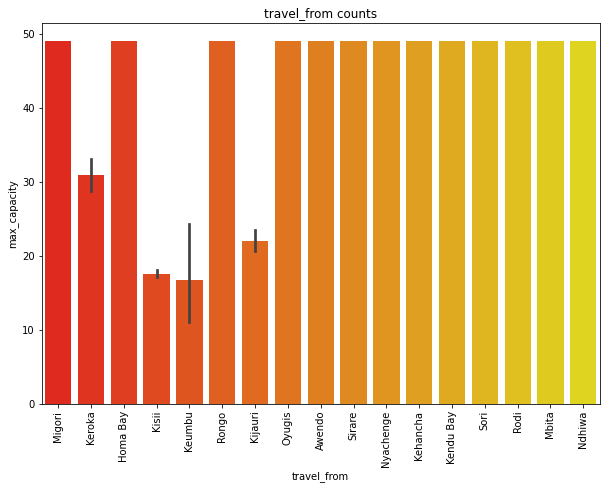

In [17]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x="travel_from", y="max_capacity", data=dppt, palette= 'autumn')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
# ax.set_xlabel('travel_from')
# ax.set_ylabel('max_capacity')
ax.set_title('travel_from counts')

## travel_from counts

Text(0.5, 1.0, 'travel_from counts')

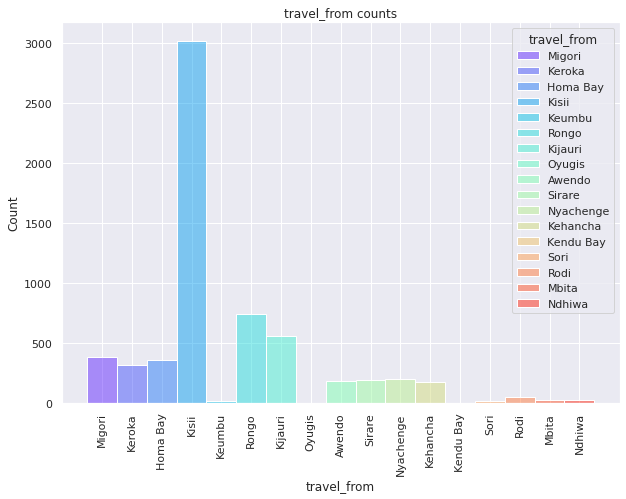

In [18]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.histplot(x='travel_from', data=dppt, hue='travel_from', palette='rainbow')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
# ax.set_xlabel('travel_from')
# ax.set_ylabel('Frequency')
ax.set_title('travel_from counts')

Text(0.5, 1.0, 'car_type counts')

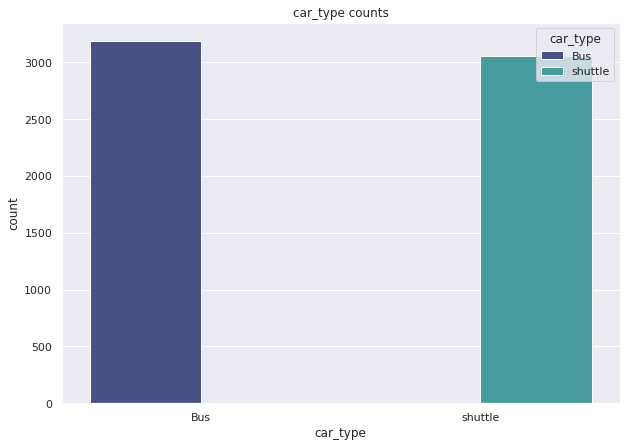

In [19]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='car_type', data=dppt, hue='car_type', palette='mako')
sns.set_theme(style='darkgrid')
ax.set_xlabel('car_type')
# ax.set_ylabel('Frequency')
ax.set_title('car_type counts')

Text(0.5, 1.0, 'max_capacity counts')

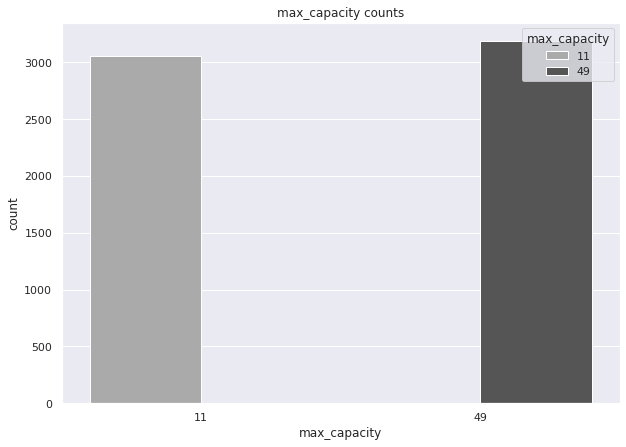

In [20]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='max_capacity', data=dppt, hue='max_capacity', palette='binary')
sns.set_theme(style='darkgrid')
ax.set_xlabel('max_capacity')
# ax.set_ylabel('Frequency')
ax.set_title('max_capacity counts')

Text(0.5, 1.0, 'travel_from counts')

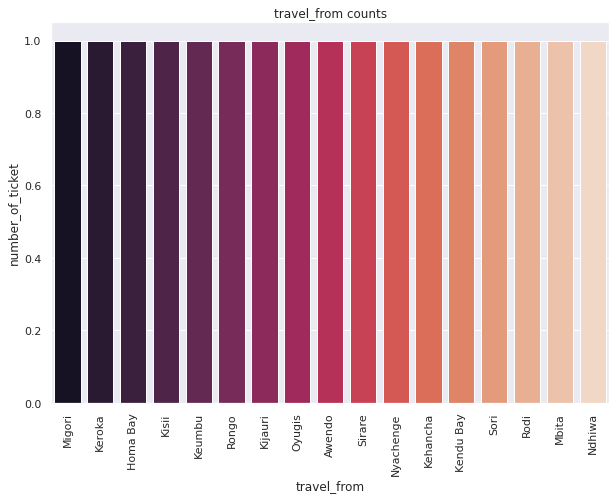

In [28]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x="travel_from", y="number_of_ticket", data=dppt, palette= 'rocket')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
# ax.set_xlabel('travel_from')
# ax.set_ylabel('Frequency')
ax.set_title('travel_from counts')

##Feature Engineering##



In [29]:
# Coping the dataset to a new variable
trans_dppt = dppt.copy()

In [30]:
# Extracting the date and time column to get time based informations
 
trans_dppt['travel_year']= trans_dppt['travel_date_and_time'].dt.year
trans_dppt['travel_month']= trans_dppt['travel_date_and_time'].dt.month
trans_dppt['travel_year_quarter']= trans_dppt['travel_date_and_time'].dt.quarter
trans_dppt['travel_day_of_year']= trans_dppt['travel_date_and_time'].dt.dayofyear
trans_dppt['travel_day_of_month']= trans_dppt['travel_date_and_time'].dt.day
trans_dppt['travel_day_of_week']= trans_dppt['travel_date_and_time'].dt.dayofweek
trans_dppt['travel_is_in_weekend']= trans_dppt['travel_day_of_week'].apply(lambda d: 1 if d in [5,6] else 0)
trans_dppt['travel_hour']= trans_dppt['travel_date_and_time'].dt.hour
# trans_dppt['travel_minute']= trans_dppt['travel_date_and_time'].dt.minute

Text(0.5, 1.0, 'month based travel counts')

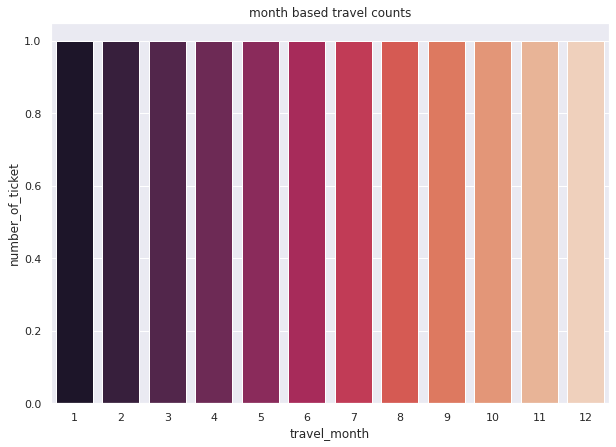

In [31]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x="travel_month", y="number_of_ticket", data=trans_dppt, palette='rocket')
sns.set_theme(style='darkgrid')
ax.set_title('month based travel counts')

From the above plot ticket booking are happening in all the 12 months of a year.

Text(0.5, 1.0, 'dates of a month based travel counts')

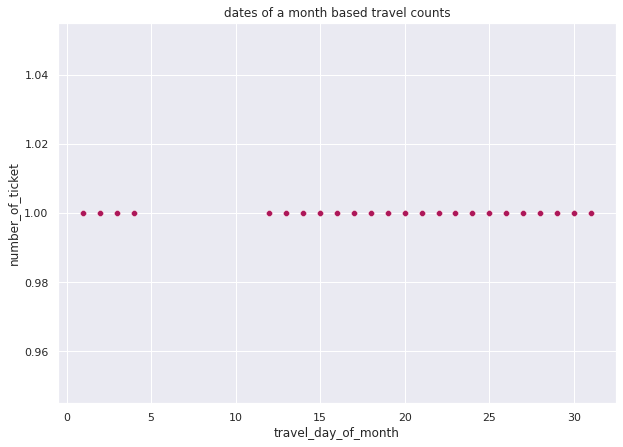

In [32]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.scatterplot(x="travel_day_of_month", y="number_of_ticket", data=trans_dppt, color='#ad1759')
sns.set_theme(style='darkgrid')
ax.set_title('dates of a month based travel counts')

We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holyday of public transport between these days. we can also say that the number of tickets in all the days of month are same.


Text(0.5, 1.0, 'days of a week based travel counts')

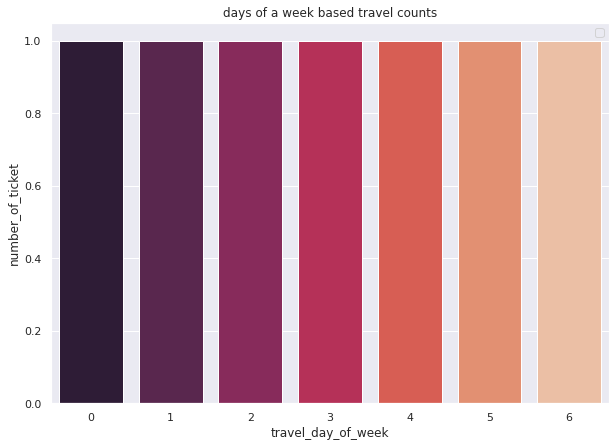

In [33]:
# days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x="travel_day_of_week", y="number_of_ticket", data=trans_dppt, palette= 'rocket')
plt.legend( loc='upper right')
sns.set_theme(style='darkgrid')
ax.set_title('days of a week based travel counts')

From the above plot ticket booking are happening in all the 7 days of a week.

Text(0.5, 1.0, 'hour of a day based travel counts')

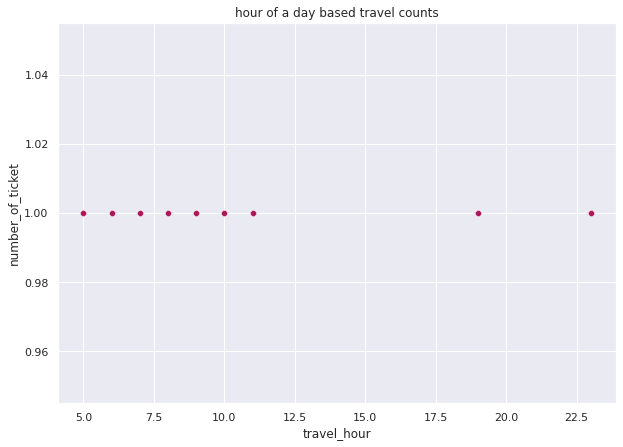

In [34]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.scatterplot(x="travel_hour", y="number_of_ticket", data=trans_dppt, color='#ad1759')
sns.set_theme(style='darkgrid')
ax.set_title('hour of a day based travel counts')

We can see that most of the tickets were sold at 7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

From the above we can say that there is not ride between 12 PM to 5.30 PM

In [36]:
travel_time_to_Nairobi_dict = {'Awendo': 6*60+24, 'Homa Bay': 6*60+29, 'Kehancha': 6*60+11, 'Kendu Bay': 6*60, 'Keroka': 4*60+55, 'Keumbu': 5*60+13, 'Kijauri': 4*60+44, 
 'Kisii': 5*60+29, 'Mbita': 7*60+8, 'Migori': 6*60+54, 'Ndhiwa': 6*60+47, 'Nyachenge': 5*60+40, 'Oyugis': 5*60+42, 'Rodi': 6*60+40, 'Rongo': 6*60+5, 'Sirare': 8*60+4, 'Sori': 7*60+11}
trans_dppt['travel_time_to_Nairobi'] = trans_dppt.travel_from.map(travel_time_to_Nairobi_dict)

Text(0.5, 1.0, 'Distribution of travel time to Nairobi')

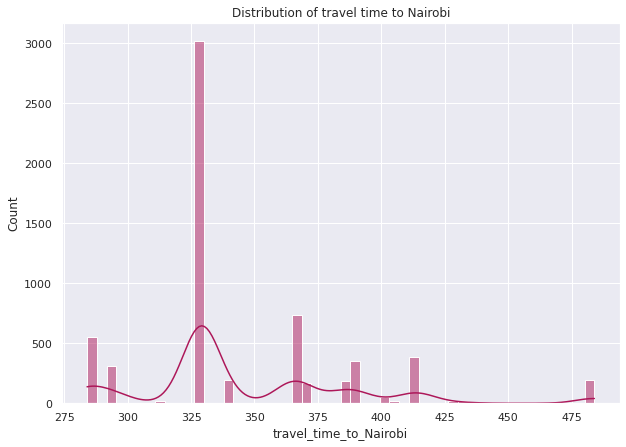

In [37]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.histplot(x="travel_time_to_Nairobi", data=trans_dppt, color='#ad1759', kde=True)
sns.set_theme(style='darkgrid')
ax.set_title('Distribution of travel time to Nairobi')

In [39]:
from datetime import timedelta

for key in travel_time_to_Nairobi_dict.keys(): 
    travel_time_to_Nairobi_dict[key]=timedelta( minutes=travel_time_to_Nairobi_dict[key])
travel_time_to_Nairobi_dict

{'Awendo': datetime.timedelta(seconds=23040),
 'Homa Bay': datetime.timedelta(seconds=23340),
 'Kehancha': datetime.timedelta(seconds=22260),
 'Kendu Bay': datetime.timedelta(seconds=21600),
 'Keroka': datetime.timedelta(seconds=17700),
 'Keumbu': datetime.timedelta(seconds=18780),
 'Kijauri': datetime.timedelta(seconds=17040),
 'Kisii': datetime.timedelta(seconds=19740),
 'Mbita': datetime.timedelta(seconds=25680),
 'Migori': datetime.timedelta(seconds=24840),
 'Ndhiwa': datetime.timedelta(seconds=24420),
 'Nyachenge': datetime.timedelta(seconds=20400),
 'Oyugis': datetime.timedelta(seconds=20520),
 'Rodi': datetime.timedelta(seconds=24000),
 'Rongo': datetime.timedelta(seconds=21900),
 'Sirare': datetime.timedelta(seconds=29040),
 'Sori': datetime.timedelta(seconds=25860)}

In [44]:
trans_dppt['travel_arrival_data_and_time'] = trans_dppt.travel_from.map(travel_time_to_Nairobi_dict)
trans_dppt['travel_arrival_data_and_time'] = trans_dppt.travel_date_and_time + trans_dppt['travel_arrival_data_and_time']
trans_dppt['travel_arrival_hour'] = trans_dppt.travel_arrival_data_and_time.dt.hour
trans_dppt['travel_arrival_minute'] = trans_dppt.travel_arrival_data_and_time.dt.minute
trans_dppt["travel_is_in_rush_hour"]= trans_dppt.travel_arrival_hour.apply(lambda h: 1 if (h>=7) and (h<= 17) else 0)

In [40]:
trans_dppt.columns

Index(['ride_id', 'travel_from', 'car_type', 'max_capacity',
       'number_of_ticket', 'travel_date_and_time', 'travel_year',
       'travel_month', 'travel_year_quarter', 'travel_day_of_year',
       'travel_day_of_month', 'travel_day_of_week', 'travel_is_in_weekend',
       'travel_hour', 'travel_time_to_Nairobi'],
      dtype='object')

In [46]:
trans_dppt.columns

Index(['ride_id', 'travel_from', 'car_type', 'max_capacity',
       'number_of_ticket', 'travel_date_and_time', 'travel_year',
       'travel_month', 'travel_year_quarter', 'travel_day_of_year',
       'travel_day_of_month', 'travel_day_of_week', 'travel_is_in_weekend',
       'travel_hour', 'travel_time_to_Nairobi', 'travel_arrival_data_and_time',
       'travel_arrival_hour', 'travel_arrival_minute',
       'travel_is_in_rush_hour'],
      dtype='object')

In [49]:
req_columns = ['car_type', 'travel_day_of_week','travel_day_of_year', 'travel_is_in_weekend', 'travel_hour', 'travel_year', 'travel_year_quarter',
       'travel_hour_wise_weights', 'travel_day_of_year_wise_weights',
       'delay_btw_initial_to_next_and_previous_bus',
       'delay_btw_1bus_and_next_bus', 'delay_btw_1bus_and_previous_bus',
       'delay_btw_2bus_and_next_bus', 'delay_btw_2bus_and_previous_bus',
       'delay_btw_3bus_and_next_bus', 'delay_btw_3bus_and_previous_bus',
       'travel_distance_to_Nairobi', 'travel_time_to_Nairobi', 'travel_speed_to_Nairobi', 'travel_arrival_hour', 'travel_is_in_rush_hour', 
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha', 
       'travel_from_Keroka', 'travel_from_Keumbu', 'travel_from_Kijauri', 
       'travel_from_Kisii', 'travel_from_Mbita', 'travel_from_Migori', 
       'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Rodi', 
       'travel_from_Rongo', 'travel_from_Sirare', 'travel_from_Sori',
       'travel_day_of_month_wise_weights_1',
       'travel_day_of_month_wise_weights_2',
       'travel_day_of_month_wise_weights_3',
       'travel_day_of_month_wise_weights_4',
       'travel_month_wise_weights_1', 'travel_month_wise_weights_2', 'travel_month_wise_weights_3',
       'number_of_ticket']
len(req_columns)

44

In [55]:
trans_dppt.head()

,ride_id,travel_from,car_type,max_capacity,number_of_ticket,travel_date_and_time,travel_year,travel_month,travel_year_quarter,travel_day_of_year,travel_day_of_month,travel_day_of_week,travel_is_in_weekend,travel_hour,travel_time_to_Nairobi,travel_arrival_data_and_time,travel_arrival_hour,travel_arrival_minute,travel_is_in_rush_hour
0,1442,Migori,Bus,49,1,2017-10-17 07:15:00,2017,10,4,290,17,1,0,7,414,2017-10-17 14:09:00,14,9,1
1,5437,Migori,Bus,49,1,2017-11-19 07:12:00,2017,11,4,323,19,6,1,7,414,2017-11-19 14:06:00,14,6,1
2,5710,Keroka,Bus,49,1,2017-11-26 07:05:00,2017,11,4,330,26,6,1,7,295,2017-11-26 12:00:00,12,0,1
3,5777,Homa Bay,Bus,49,1,2017-11-27 07:10:00,2017,11,4,331,27,0,0,7,389,2017-11-27 13:39:00,13,39,1
4,5778,Migori,Bus,49,1,2017-11-27 07:12:00,2017,11,4,331,27,0,0,7,414,2017-11-27 14:06:00,14,6,1


Text(0.5, 1.0, 'Public Transport dataset correlation table')

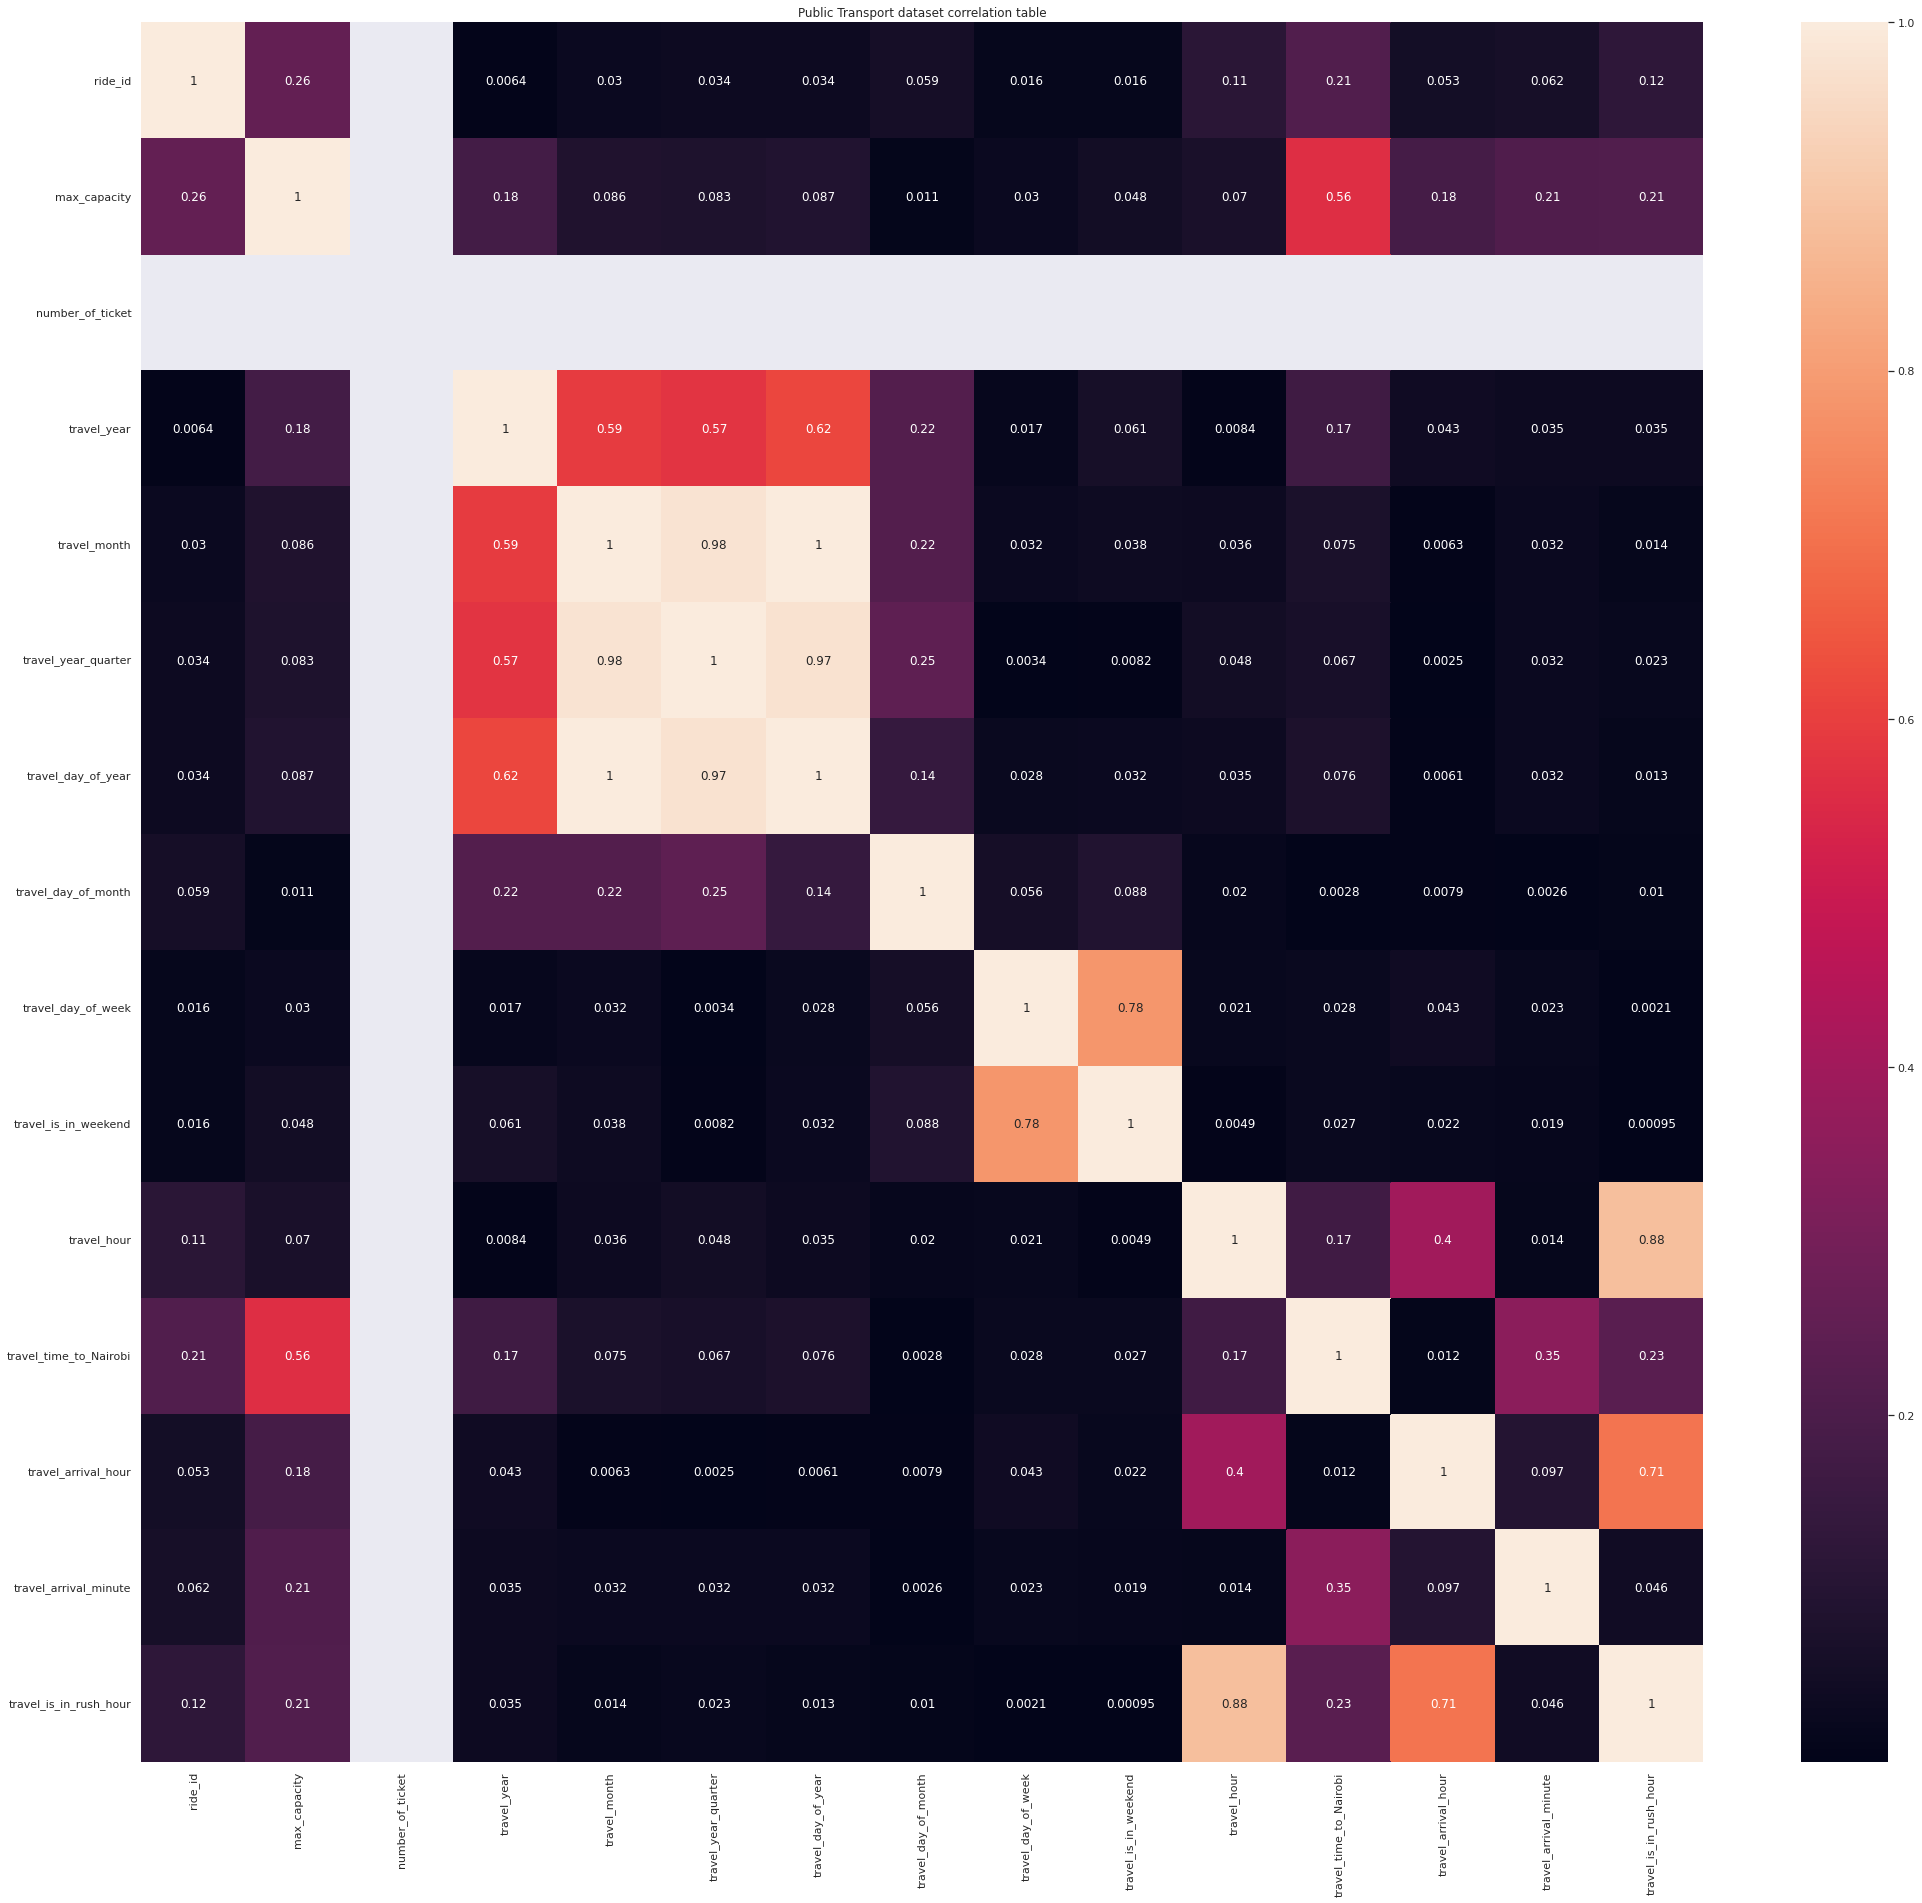

In [56]:
trans_dppt_corr = trans_dppt.corr()
fig = plt.figure(figsize=(35,32))
ax = fig.gca()
sns.heatmap(abs(trans_dppt_corr), annot=True, cmap='rocket')
plt.title('Public Transport dataset correlation table')

#Training Models

In [57]:
# Importing the required sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score

In [58]:
def adjusted_r2(x, r2):
  '''This function will take X variables' dataset and r^2 value as inputs and can return the adjusted r^2 as output'''
  n = len(x)
  p = len(x.columns)
  adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
  return adj_r2

In [59]:
# Seperating dependent and independent variables of the dataset
X = trans_dppt.drop(['number_of_ticket'], axis= 1).copy()
y = trans_dppt['number_of_ticket'].copy()

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (6249, 18)
Shape of y: (6249,)


In [60]:
# Splitting the dataset for Training and Testing models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 30)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}\n")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4374, 18)
Shape of y_train: (4374,)

Shape of X_test: (1875, 18)
Shape of y_test: (1875,)


#Random Forest Regressor

In [61]:
# Importing the RandomForest packages
from sklearn.ensemble import RandomForestRegressor

#Grid Search Cross Validation on Random Forest Regressor

In [72]:
rfr = RandomForestRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [73]:
# Importing the GridSearch Cross Valiation Packages
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1000, num = 4)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 100, num = 4)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 12]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the parameters grid
grid_params_dict = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(grid_params_dict)

{'bootstrap': [True, False],
 'max_depth': [40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [5, 10, 12],
 'n_estimators': [400, 600, 800, 1000]}
